In [1]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()


In [2]:
import pandas as pd
import numpy as np

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


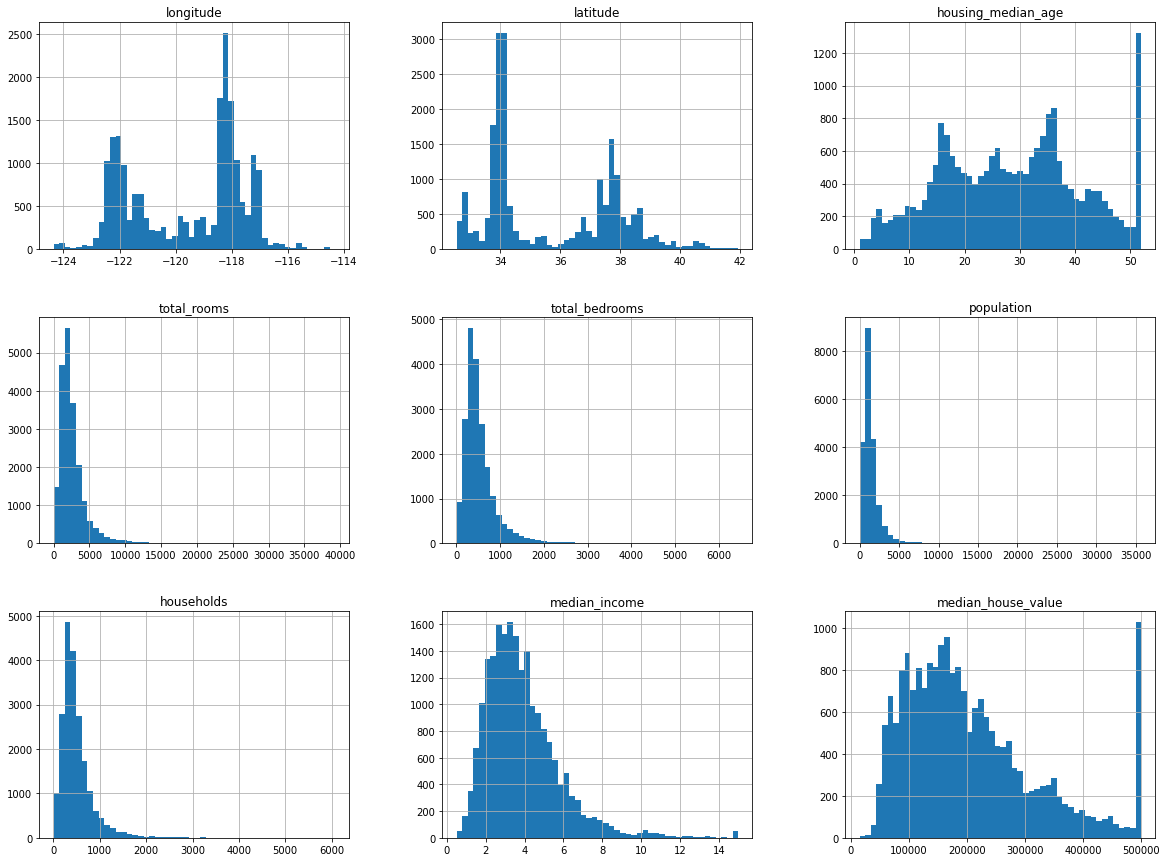

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [9]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [11]:
housing["income_cat"].value_counts()/len(housing["households"])

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
for set in (strat_train_set,strat_test_set):
    set.drop("income_cat",axis=1,inplace=True)

In [13]:
housing=strat_train_set.copy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


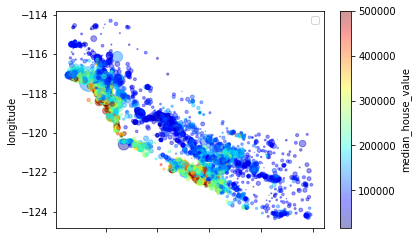

In [14]:
housing.plot(kind="scatter",x="latitude",y="longitude",alpha=0.4,s=housing["population"]/100,c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

In [15]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

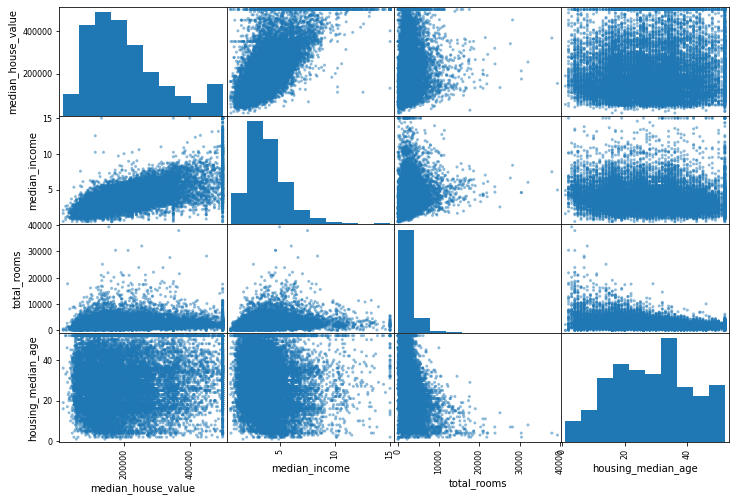

In [16]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

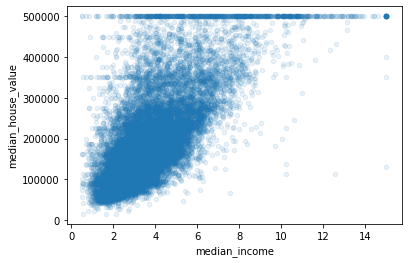

In [17]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [18]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_household"]=housing["total_bedrooms"]/housing["households"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
bedrooms_per_household     -0.043349
longitude                  -0.047466
latitude                   -0.142673
Name: median_house_value, dtype: float64

In [19]:
housing_labels=strat_train_set["median_house_value"].copy()
housing=strat_train_set.drop("median_house_value",axis=1)



In [20]:
#Data Cleaning using Imputer
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

housing_num=housing.drop("ocean_proximity",axis=1)

x=imputer.fit_transform(housing_num)
housing_tr=pd.DataFrame(x,columns=housing_num.columns)

In [21]:
#One_hot_encoding and sparse matrix
"""from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=housing["ocean_proximity"]
housing_cat_encoded=encoder.fit_transform(housing_cat)

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))"""

'from sklearn.preprocessing import LabelEncoder\nencoder=LabelEncoder()\nhousing_cat=housing["ocean_proximity"]\nhousing_cat_encoded=encoder.fit_transform(housing_cat)\n\nfrom sklearn.preprocessing import OneHotEncoder\nencoder=OneHotEncoder()\nhousing_cat_1hot=encoder.fit_transform(housing_cat_encoded.reshape(-1,1))'

In [22]:
#One_hot_encoding and sparse matrix (efficient way)
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer(sparse_output=True)
housing_cat=housing["ocean_proximity"]
housing_cat_1hot=encoder.fit_transform(housing_cat)
print(housing_cat_1hot)

  (0, 1)	1
  (1, 4)	1
  (2, 1)	1
  (3, 4)	1
  (4, 0)	1
  (5, 3)	1
  (6, 0)	1
  (7, 0)	1
  (8, 0)	1
  (9, 0)	1
  (10, 1)	1
  (11, 0)	1
  (12, 1)	1
  (13, 1)	1
  (14, 4)	1
  (15, 0)	1
  (16, 0)	1
  (17, 0)	1
  (18, 3)	1
  (19, 0)	1
  (20, 1)	1
  (21, 3)	1
  (22, 1)	1
  (23, 0)	1
  (24, 1)	1
  :	:
  (16487, 1)	1
  (16488, 0)	1
  (16489, 4)	1
  (16490, 4)	1
  (16491, 1)	1
  (16492, 1)	1
  (16493, 0)	1
  (16494, 0)	1
  (16495, 0)	1
  (16496, 1)	1
  (16497, 0)	1
  (16498, 4)	1
  (16499, 0)	1
  (16500, 0)	1
  (16501, 1)	1
  (16502, 1)	1
  (16503, 1)	1
  (16504, 1)	1
  (16505, 0)	1
  (16506, 0)	1
  (16507, 0)	1
  (16508, 1)	1
  (16509, 0)	1
  (16510, 0)	1
  (16511, 1)	1


In [32]:
#Custom Transformations
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6

class CombinedAttributesAddr(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,bedrooms_per_room,rooms_per_household,population_per_household]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
        
attr_addr=CombinedAttributesAddr(add_bedrooms_per_room=False)
housing_extra_attr=attr_addr.transform(housing.values)


In [34]:
#Feature Scaling
#Transformational Pipelines


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

piepline=Pipeline([('imputer',SimpleImputer(strategy="median")),
                   ('attr_addr',CombinedAttributesAddr(add_bedrooms_per_room=False)),
                   ('scaler',StandardScaler())])
housing_num_tr=piepline.fit_transform(housing_num)

from sklearn.pipeline import FeatureUnion

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names=attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

num_attr=list(housing_num)
cat_attr=["ocean_proximity"]

num_pipeline=Pipeline([('selector', DataFrameSelector(num_attr)),
                       ('imputer',SimpleImputer(strategy="median")),
                       ('attr_addr',CombinedAttributesAddr(add_bedrooms_per_room=False)),
                       ('scaler',StandardScaler())])

cat_pipeline=Pipeline([('selector', DataFrameSelector(cat_attr)),
                       ('label_binarizer',LabelBinarizer())])

full_pipeline=FeatureUnion(transformer_list=[('num_pipeline',num_pipeline),
                                         ('cat_pipeline',cat_pipeline)])


In [35]:
housing_prepared=full_pipeline.fit_transform(housing)
housing_prepared.shape

TypeError: fit_transform() takes 2 positional arguments but 3 were given